In [1]:
import pennylane as qml
import pennylane.numpy as np
import jax.numpy as jnp
import jax

jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

In [2]:
dat = np.load("data/legendre_s2n.npz", allow_pickle=True)

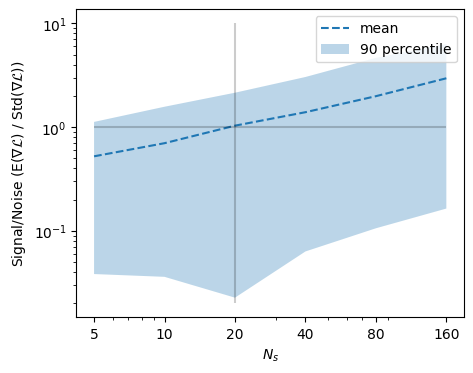

In [3]:
fig, ax = plt.subplots(figsize=(5, 4))

n_tauss, grads, grad_exact = dat["n_tauss"], dat["grads"], dat["grad_exact"]
grad_exact = grad_exact.reshape(-1)
std = np.abs(np.mean(grads, axis=0)) / np.std(grads, axis=0)

y = np.mean(std, axis=1)
lower_percentile = np.percentile(std, 5, axis=1)  # 5th percentile (90% below)
upper_percentile = np.percentile(std, 95, axis=1)  # 95th percentile (90% above)

ax.plot(n_tauss, y, "--", label="mean")
ax.fill_between(n_tauss, lower_percentile, upper_percentile, alpha=0.3, label="90 percentile")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks(n_tauss, n_tauss)
ax.set_ylabel("Signal/Noise (E($\\nabla \\mathcal{L}$) / Std($\\nabla \\mathcal{L}$))")
ax.set_xlabel("$N_s$")
ax.legend()

ax.vlines([20], np.min(2e-2), 10., color="k", alpha=0.2)
ax.hlines([1], np.min(n_tauss), np.max(n_tauss), color="k", alpha=0.2)
#ax.set_yticks([1., 2., 10.], ["$1 \\times 10^0$", "$2 \\times 10^0$", "$1 \\times 10^1$"])

# ax.plot(n_tauss, np.sqrt(n_tauss))

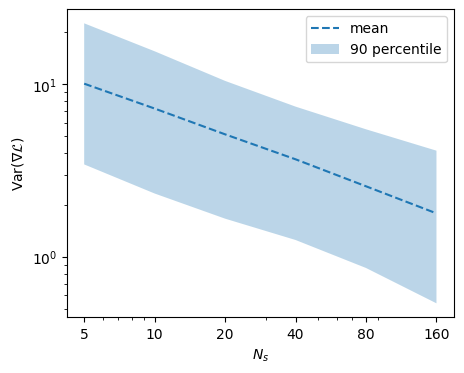

In [4]:
fig, ax = plt.subplots(figsize=(5, 4))

n_tauss, grads, grad_exact = dat["n_tauss"], dat["grads"], dat["grad_exact"]
grad_exact = grad_exact.reshape(-1)
std = np.std(grads, axis=0)
std = std

y = np.mean(std, axis=1)
lower_percentile = np.percentile(std, 5, axis=1)  # 5th percentile (90% below)
upper_percentile = np.percentile(std, 95, axis=1)  # 95th percentile (90% above)

ax.plot(n_tauss, y, "--", label="mean")
ax.fill_between(n_tauss, lower_percentile, upper_percentile, alpha=0.3, label="90 percentile")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks(n_tauss, n_tauss)
ax.set_ylabel("Var($\\nabla \\mathcal{L}$)")
ax.set_xlabel("$N_s$")
ax.legend()